In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
import scipy.stats as sp
from sklearn.model_selection import GridSearchCV as GS

## Previously, I built SVR/SVC models using GridSearch.

Now, I will attempt to build Random Forest models using the GridSearch function to optimise the models being built.

In [2]:
msft = pd.DataFrame.from_csv('MSFT.csv')
msft = msft.interpolate()
#changing the index to go from 1986 to 2016
msft = msft.reindex(index=msft.index[::-1])
investor = pd.DataFrame.from_csv('investor.csv')
investor = investor.fillna(investor.mean())
#changing the index to go from 1987 to 2016
investor = investor.reindex(index=investor.index[::-1])

In [3]:
#quick reminder of what the data looks like
msft.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.060989,0.069957,0.060989,0.066968,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.066968,0.070555,0.066968,0.069360,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.069360,0.071153,0.069360,0.070555,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.070555,0.071153,0.068164,0.068762,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.068762,0.069360,0.066968,0.067566,4.789440e+07


In [4]:
investor.head()

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
Date,,,,,,,,,,,,
1987-06-26,0.384424,0.312702,0.302874,0.999999,0.384009,0.08155,0.386014,0.489178,0.28285,1038.23181,1011.831541,1026.840289
1987-07-17,0.384424,0.312702,0.302874,0.999999,0.384009,0.08155,0.386014,0.489178,0.28285,314.59000,307.630000,314.590000
1987-07-24,0.360000,0.500000,0.140000,1.000000,0.384009,0.22000,0.386014,0.489178,0.28285,311.39000,307.810000,309.270000
1987-07-31,0.260000,0.480000,0.260000,1.000000,0.384009,0.00000,0.386014,0.489178,0.28285,318.66000,310.650000,318.660000
1987-08-07,0.560000,0.150000,0.290000,1.000000,0.384009,0.27000,0.386014,0.489178,0.28285,323.00000,316.230000,323.000000


In [3]:
def evaluateModel(prediction,actual):    
    prediction.plot(color='red', label='Prediction')
    actual.plot(color='blue', label='Actual')
    plt.legend(loc='best')
    prediction = np.array(prediction.tolist())
    actual = np.array(actual.tolist())
    print('Pearson Correlation Coeefiecient: ', sp.pearsonr(actual, prediction))
    error2 = [((x-y)/y)**2 for x, y in zip(prediction, actual)]
    print ("Normalised RMSE",np.sqrt(np.sum(error2)))

In [4]:
pre2006 = investor['1987':'2005']
trainData = pre2006[['Bullish','Neutral','Bearish']]
pre2006 = msft.loc[trainData.index]
pre2006 = pre2006.interpolate()
trainOutput = pre2006.Open

In [5]:
investor2006 = investor['2006']
testData = investor2006[['Bullish','Neutral','Bearish']]
msft2006 = msft.loc[testData.index].interpolate()
testOutput = msft2006.Open

In [8]:
params =[ {'criterion':[ 'mae', 'mse'],
          'max_features':['auto', 'sqrt', 'log2'],
          'min_samples_split':[2,3],
          'bootstrap':[False],
          'oob_score':[False],
          'min_samples_leaf':[1,2,3],
          'n_jobs':[6]},
         {'criterion':[ 'mae', 'mse'],
          'max_features':['auto', 'sqrt', 'log2'],
          'min_samples_split':[2,3],
          'bootstrap':[True],
          'oob_score':[True],
          'min_samples_leaf':[1,2,3],
          'n_jobs':[6]} 
        ]

In [9]:
randomForestRegression = RFR()
gridsearch = GS(randomForestRegression, param_grid=params)
gridsearch.fit(trainData,trainOutput)
gridsearch.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_jobs': 6,
 'oob_score': True}

In [6]:
randomForestRegression = RFR(
 n_estimators=1000,
 bootstrap= True,
 criterion= 'mae',
 max_features= 'sqrt',
 min_samples_leaf= 3,
 min_samples_split= 2,
 n_jobs= 6,
 oob_score= True)

('Pearson Correlation Coeefiecient: ', (0.40579475809566595, 0.0028388941214318075))
('Normalised RMSE', 9.3654434058378921)


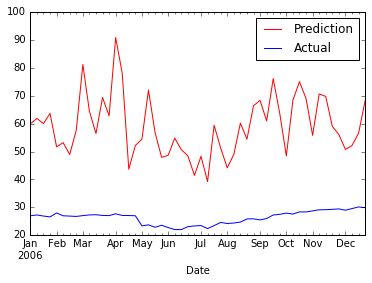

In [7]:
randomForestRegression.fit(trainData,trainOutput)
prediction = randomForestRegression.predict(testData)
prediction = pd.Series(prediction, testData.index)
evaluateModel(prediction,testOutput)

Random Forest seem to outperform SVM in terms of regression scoring better in both pearson correlation and nRMSE. Now let's have a look at Random Forest's Classifier.

In [16]:
trainOutputClf = []
previousday = trainOutput[0]
for stock in trainOutput[1:]:    
    if (stock > previousday):
        trainOutputClf.append(1)
    else:
        trainOutputClf.append(-1)
    previousday = stock

In [17]:
lastdayof2005 = investor['2005']
lastdayof2005 = lastdayof2005.index[-1]
last2005stock = msft.loc[lastdayof2005].Open

In [20]:
testOutputClf = []
previousday=last2005stock
for stock in testOutput:    
    if (stock > previousday):
        testOutputClf.append(1)
    else:
        testOutputClf.append(-1)
    previousday = stock

In [26]:
params2 =[ {'criterion':[ 'gini', 'entropy'],
          'max_features':['auto', 'log2'],
          'min_samples_split':[2,3],
          'bootstrap':[False],
          'oob_score':[False],
          'min_samples_leaf':[1,2,3],
          'n_jobs':[6]},
         {'criterion':[ 'gini', 'entropy'],
          'max_features':['auto', 'log2'],
          'min_samples_split':[2,3],
          'bootstrap':[True],
          'oob_score':[True],
          'min_samples_leaf':[1,2,3],
          'n_jobs':[6]} 
        ]

In [29]:
randomForestClassifier = RFC()
gridsearch = GS(randomForestClassifier, param_grid=params2)
gridsearch.fit(trainData[1:],trainOutputClf)
gridsearch.best_params_

/home/chuanfuyap/Applications/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_jobs': 6,
 'oob_score': True}

In [37]:
randomForestClassifier = RFC(
 n_estimators=1000,
 bootstrap= True,
 criterion= 'gini',
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_jobs= 6,
 oob_score= True
    )

In [38]:
randomForestClassifier.fit(trainData[1:],trainOutputClf)
prediction = randomForestClassifier.predict(testData)

print('Prediction: ',randomForestClassifier.predict(testData))
print('Actual: ', testOutputClf)
from __future__ import division

trackright=0
for x , y in zip(prediction, testOutputClf):
    if (x==y):
        trackright+=1
trackright/len(testOutputClf)

('Prediction: ', array([-1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,
        1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
        1]))
('Actual: ', [1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1])


0.5192307692307693

It seems with Random Forest's Classifier, it is only right 50% of the time, though still better than SVM's which was only 44%.

bias correction on RFR

('Pearson Correlation Coeefiecient: ', (0.74163173911001379, 5.3298557916361e-169))
('Normalised RMSE', 14.747200814112336)


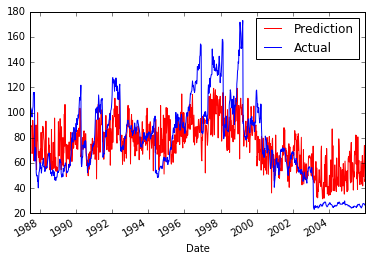

In [27]:
prediction = randomForestRegression.predict(trainData)
prediction = pd.Series(prediction, trainData.index)
evaluateModel(prediction,trainOutput)

In [28]:
meandiff = abs(prediction.mean() - trainOutput.mean())
meandiff

0.84022174273872

('Pearson Correlation Coeefiecient: ', (0.40579475809566601, 0.0028388941214317967))
('Normalised RMSE', 9.1428304666331499)


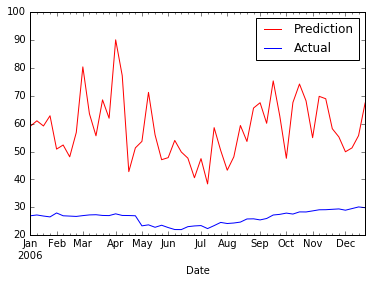

In [30]:
prediction = randomForestRegression.predict(testData)
prediction = pd.Series(prediction, testData.index)
prediction = prediction.subtract(meandiff)
evaluateModel(prediction, testOutput)